**1. INTRODUCTION**

- This task aims to use the data collected from used car advertisement in order to build and evaluate a machine learning algorithm that will predict the price of used cars
- There are multiple parameters extracted which can be used to predict the price of the used cars
- This is a multiple linear regression problem as we will be using multiple variables to predict the target variable (price of used cars)

In [740]:
#importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [741]:
#reading test csv
df_test = pd.read_csv("rihal_data_test.csv")
df_test.head()

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,BMW,automatic,white,115000,2012,gasoline,gasoline,4.4,sedan,False,owned,all,True,32,104,146,20450.0
1,Mercedes-Benz,manual,other,500000,1999,diesel,diesel,2.2,sedan,False,owned,rear,False,7,9,147,2600.0
2,Fiat,manual,silver,210000,2002,gasoline,gasoline,1.2,hatchback,False,owned,front,True,16,7,27,2900.0
3,Mitsubishi,automatic,violet,294000,2000,diesel,diesel,3.2,suv,False,owned,all,True,10,2,48,7500.0
4,Opel,automatic,blue,244000,1998,gasoline,gasoline,1.6,sedan,False,owned,front,False,9,10,116,2200.0


In [742]:
#reading train csv
df_train = pd.read_csv("rihal_data_train.csv")
df_train.head()

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,Volkswagen,automatic,black,130000,2016,diesel,diesel,1.6,universal,False,owned,front,True,17,38,67,13150.0
1,Renault,manual,brown,149000,2012,gasoline,gasoline,1.6,sedan,False,owned,front,False,9,3,100,7500.0
2,Kia,automatic,brown,110000,2014,gasoline,gasoline,1.6,hatchback,False,owned,front,False,5,10,91,12200.0
3,Opel,automatic,other,255100,2007,gasoline,gasoline,1.8,hatchback,False,owned,front,False,10,4,91,4950.0
4,Mazda,manual,blue,650000,1999,gasoline,gasoline,2.0,sedan,False,owned,front,True,5,7,62,3000.0


In [743]:
#printing the shape of the test and train dataframes
print(df_train.shape)
print(df_test.shape)

(50000, 17)
(27000, 17)


**2. DATA CLEANING**

This is one of the most important steps. Data cleaning is the process of correcting or removing corrupt, incorrect, or unnecessary data from a data set before data analysis. I have taken the following step by step process to clean the data

1. Remove duplicates
2. Deal with null values (either remove or replace)
3. Check for outliers

**i) Duplicates**

Here since there are no specific columns we can use to identify duplicates (eg: the car number plate would have been a good column to remove duplicates), here I have removed duplicates based on all columns

In [744]:
# Selecting duplicate rows except first 
# occurrence based on all columns
df_train_duplicate = df_train[df_train.duplicated()]

print("Duplicate Rows :")
  
# Print the resultant Dataframe
df_train_duplicate.shape

Duplicate Rows :


(16258, 17)

In [745]:
df_test_duplicate = df_test[df_test.duplicated()]

print("Duplicate Rows :")
  
# Print the resultant Dataframe
df_test_duplicate.shape

Duplicate Rows :


(4753, 17)

It appears that there are plenty of duplicate entires in both testing and training datasets. Hence I have removed the duplicate rows

In [746]:
#dropping duplicates from training dataframe
df_train = df_train.drop_duplicates()
print(df_train.shape)

(33742, 17)


In [747]:
#dropping duplicates from testing dataframe
df_test = df_test.drop_duplicates()
print(df_test.shape)

(22247, 17)


In [748]:
#rechecking the duplicates in testing and training datasets
df_train_duplicate = df_train[df_train.duplicated()]
print("Duplicate Rows :")

# Print the resultant Dataframe
df_train_duplicate.shape

Duplicate Rows :


(0, 17)

In [749]:
df_test_duplicate = df_test[df_test.duplicated()]
print("Duplicate Rows :")
  
# Print the resultant Dataframe
df_test_duplicate.shape

Duplicate Rows :


(0, 17)

**ii) Null values**

Here I have taken a 2 setp process
1. Determine the number of null values
2. Based on the number of null values, modify dataframe
a) If the null values are only a small % of data, then we can safely remove them
b) If the null values account for a large % of data, then we might lose a lot of data if we remove them, instead we can fill in the missing values using various methods such as using the mean value

In [750]:
#checking for null values in the training dataset
df_train.isnull().sum()

manufacturer_name        0
transmission             0
color                    0
odometer_value           0
year_produced            0
engine_fuel              0
engine_type              0
engine_capacity          9
body_type                0
has_warranty             0
ownership                0
type_of_drive            0
is_exchangeable          0
number_of_photos         0
number_of_maintenance    0
duration_listed          0
price_usd                0
dtype: int64

In [751]:
#checking for null values in the testing dataset
df_test.isnull().sum()

manufacturer_name        0
transmission             0
color                    0
odometer_value           0
year_produced            0
engine_fuel              0
engine_type              0
engine_capacity          4
body_type                0
has_warranty             0
ownership                0
type_of_drive            0
is_exchangeable          0
number_of_photos         0
number_of_maintenance    0
duration_listed          0
price_usd                0
dtype: int64

Since the number of null values are only a very few, rows with null values are removed from the dataframes

In [752]:
df_train=df_train.dropna()
print(df_train.shape)

(33733, 17)


In [753]:
df_test=df_test.dropna()
print(df_test.shape)

(22243, 17)


**iii) Outliers**

- Dealing with outliers can be tricky. There can be arguments stating that outliers sometimes can be useful information and sometimes not. 
- In my opinion, removing outliers is legitimate only for specific reasons. In this case, outliers can be very informative. So it’s essential to understand how outliers occur and whether they might happen again as a normal part of the price prediction process.

In [754]:
# Checking for outliers
print(df_train.describe())

#Here we can evaluate valrious parameters such as the mean, standard deviation, how far is the min and max from the standard deviation. etc.

       odometer_value  year_produced  engine_capacity  number_of_photos  \
count    33733.000000   33733.000000     33733.000000      33733.000000   
mean    249251.498058    2002.937420         2.057749          9.651795   
std     135918.718598       8.045581         0.674311          6.123284   
min          0.000000    1942.000000         0.200000          1.000000   
25%     158670.000000    1998.000000         1.600000          5.000000   
50%     250000.000000    2003.000000         2.000000          8.000000   
75%     325000.000000    2009.000000         2.300000         12.000000   
max    1000000.000000    2019.000000         8.000000         86.000000   

       number_of_maintenance  duration_listed     price_usd  
count           33733.000000     33733.000000  33733.000000  
mean               16.275576        80.694631   6645.181258  
std                41.409184       112.495762   6440.976612  
min                 1.000000         0.000000      1.000000  
25%           

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


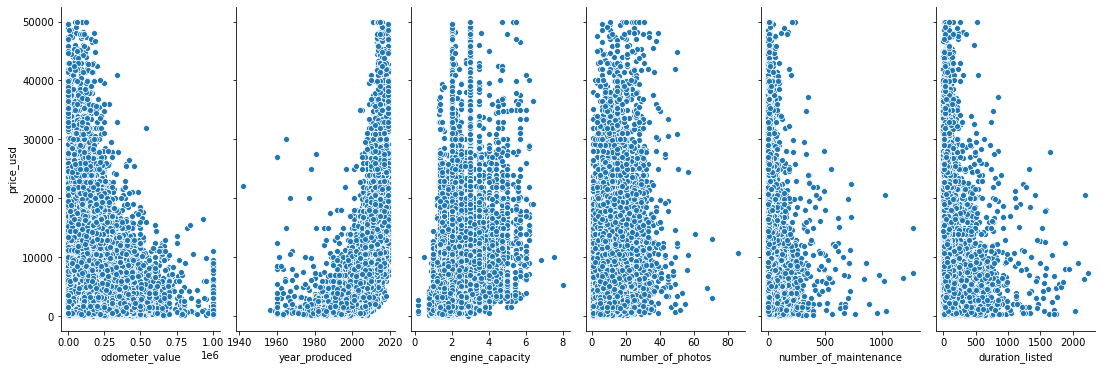

In [755]:
# visualizing the relationship between the features and the response using scatterplots
sns.pairplot(df_train, x_vars=['odometer_value','year_produced','engine_capacity','number_of_photos','number_of_maintenance','duration_listed'], y_vars='price_usd', size=5, aspect=0.5)

Although there are clearly outliers that appear to be away from the normal trend, I decided not to get rid of them due to the following reasons
1. Upon checking, it appears that there are few models with only plenty of data
2. In features such as number_of_maintenance and duration_listed, although the maximum value seems very far from the mean or percentile rank 75%, upon checking it somewhat made sense as these are mostly very old vehicles
3. In price_uds, there were vehicles even with USD 1. However, upon checking these were mostly vehicles that has been severely damaged (emergency), very old vehicles or vehicles with lots of repairs / services

In [756]:
#Following is an example of vehicles with very low price. These are mostly old vehicles / severely damaged
number_of_photos_outliers = (df_train['price_usd'] <100)
print(number_of_photos_outliers.shape)
display(df_train.loc[number_of_photos_outliers])

(33733,)


,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
2376,BMW,manual,blue,450000,1999,gasoline,gasoline,2.5,sedan,False,emergency,rear,False,7,2,1,9.49
2947,ВАЗ,manual,red,999999,1991,gasoline,gasoline,1.2,sedan,False,owned,rear,False,8,1,1,1.00
7187,ВАЗ,manual,blue,225477,1991,gasoline,gasoline,1.3,hatchback,False,emergency,front,False,2,4,14,60.00
11884,Mazda,manual,black,300000,1987,gasoline,gasoline,2.0,coupe,False,owned,front,True,5,1,0,1.00
18130,Peugeot,manual,blue,200000,1997,gasoline,gasoline,1.6,sedan,False,emergency,front,False,1,1,1,1.00
21778,Volkswagen,manual,silver,200,1996,gasoline,gasoline,1.8,sedan,False,emergency,front,False,2,1,2,94.85
22312,Renault,manual,blue,99999,1992,gasoline,gasoline,1.7,sedan,False,owned,front,False,8,1,3,10.00
31587,Mercedes-Benz,manual,white,450000,1990,diesel,diesel,2.9,van,False,owned,rear,False,1,2,2,1.42
39231,Fiat,manual,red,260000,1998,gasoline,gasoline,1.6,universal,False,emergency,front,False,2,2,2,1.00


**3. DATA PREPARATION**

**Splitting data**

The testing and training data is split into dependent (x) and target (y) variables

In [757]:
#separating the target variable from feature/dependent variables
x_train = df_train.drop('price_usd',axis=1)

#separte the predicting attribute into Y for model training 
y_train = df_train['price_usd']

In [758]:
#separating the other target variable from feature variables
x_test = df_test.drop('price_usd',axis=1)

#separte the predicting attribute into Y for model training 
y_test = df_test['price_usd']

In [759]:
print(x_train.shape)

(33733, 16)


In [760]:
print(y_train.shape)

(33733,)


In [761]:
print(x_test.shape)

(22243, 16)


In [762]:
print(y_test.shape)

(22243,)


**Dealing with categorical variables**

For linear regression, we need to ensure we only have digits to be able to perform regression. Hence we convert the categorical variables to dummy variables

In [763]:
#converting categorical variables in the training dataset to dummy variables
x_train = pd.get_dummies(data =x_train, drop_first = True)
print(x_train.shape)
display(x_train.head())

(33733, 94)


,odometer_value,year_produced,engine_capacity,has_warranty,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,manufacturer_name_Alfa Romeo,manufacturer_name_Audi,...,body_type_minivan,body_type_pickup,body_type_sedan,body_type_suv,body_type_universal,body_type_van,ownership_new,ownership_owned,type_of_drive_front,type_of_drive_rear
0,130000,2016,1.6,False,True,17,38,67,0,0,...,0,0,0,0,1,0,0,1,1,0
1,149000,2012,1.6,False,False,9,3,100,0,0,...,0,0,1,0,0,0,0,1,1,0
2,110000,2014,1.6,False,False,5,10,91,0,0,...,0,0,0,0,0,0,0,1,1,0
3,255100,2007,1.8,False,False,10,4,91,0,0,...,0,0,0,0,0,0,0,1,1,0
4,650000,1999,2.0,False,True,5,7,62,0,0,...,0,0,1,0,0,0,0,1,1,0


In [764]:
#converting categorical variables in the testing dataset to dummy variables
x_test = pd.get_dummies(data =x_test, drop_first = True)
print(x_test.shape)
display(x_test.head())

(22243, 93)


,odometer_value,year_produced,engine_capacity,has_warranty,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,manufacturer_name_Alfa Romeo,manufacturer_name_Audi,...,body_type_minivan,body_type_pickup,body_type_sedan,body_type_suv,body_type_universal,body_type_van,ownership_new,ownership_owned,type_of_drive_front,type_of_drive_rear
0,115000,2012,4.4,False,True,32,104,146,0,0,...,0,0,1,0,0,0,0,1,0,0
1,500000,1999,2.2,False,False,7,9,147,0,0,...,0,0,1,0,0,0,0,1,0,1
2,210000,2002,1.2,False,True,16,7,27,0,0,...,0,0,0,0,0,0,0,1,1,0
3,294000,2000,3.2,False,True,10,2,48,0,0,...,0,0,0,1,0,0,0,1,0,0
4,244000,1998,1.6,False,False,9,10,116,0,0,...,0,0,1,0,0,0,0,1,1,0


Suppose if we have 3 unique colours (eg: Black, White, Red), as it can be identified with just the last two columns values where for example:
00 will correspond to "Black"
01 will correspond to "White"
10 will correspond to "Red"
Which means we can drop one of the columns in this case

**Unequal training and testing dataframes**

It is noticed that the testing and training datasets are unequal as they have different number of columns, 94 and 93 respectively. This could most likely coming while converting to dummy variables. As such we might have to compare the columns from testing and training datasets

In [765]:
#checking training datset columns

x_train.columns

Index(['odometer_value', 'year_produced', 'engine_capacity', 'has_warranty',
       'is_exchangeable', 'number_of_photos', 'number_of_maintenance',
       'duration_listed', 'manufacturer_name_Alfa Romeo',
       'manufacturer_name_Audi', 'manufacturer_name_BMW',
       'manufacturer_name_Buick', 'manufacturer_name_Cadillac',
       'manufacturer_name_Chery', 'manufacturer_name_Chevrolet',
       'manufacturer_name_Chrysler', 'manufacturer_name_Citroen',
       'manufacturer_name_Dacia', 'manufacturer_name_Daewoo',
       'manufacturer_name_Dodge', 'manufacturer_name_Fiat',
       'manufacturer_name_Ford', 'manufacturer_name_Geely',
       'manufacturer_name_Great Wall', 'manufacturer_name_Honda',
       'manufacturer_name_Hyundai', 'manufacturer_name_Infiniti',
       'manufacturer_name_Iveco', 'manufacturer_name_Jaguar',
       'manufacturer_name_Jeep', 'manufacturer_name_Kia',
       'manufacturer_name_LADA', 'manufacturer_name_Lancia',
       'manufacturer_name_Land Rover', 'manufa

In [766]:
#checking testing datset columns
x_test.columns

Index(['odometer_value', 'year_produced', 'engine_capacity', 'has_warranty',
       'is_exchangeable', 'number_of_photos', 'number_of_maintenance',
       'duration_listed', 'manufacturer_name_Alfa Romeo',
       'manufacturer_name_Audi', 'manufacturer_name_BMW',
       'manufacturer_name_Buick', 'manufacturer_name_Cadillac',
       'manufacturer_name_Chery', 'manufacturer_name_Chevrolet',
       'manufacturer_name_Chrysler', 'manufacturer_name_Citroen',
       'manufacturer_name_Dacia', 'manufacturer_name_Daewoo',
       'manufacturer_name_Dodge', 'manufacturer_name_Fiat',
       'manufacturer_name_Ford', 'manufacturer_name_Geely',
       'manufacturer_name_Great Wall', 'manufacturer_name_Honda',
       'manufacturer_name_Hyundai', 'manufacturer_name_Infiniti',
       'manufacturer_name_Iveco', 'manufacturer_name_Jaguar',
       'manufacturer_name_Jeep', 'manufacturer_name_Kia',
       'manufacturer_name_LADA', 'manufacturer_name_Lancia',
       'manufacturer_name_Land Rover', 'manufa

In [767]:
#finding the column that's not common between the testing and training datasets
set(x_train.columns).symmetric_difference(set(x_test.columns))

{'engine_fuel_hybrid-diesel'}

In [768]:
#finding the location of the missing column so that we can add the same column at the same location on the testing dataset
x_train.columns.get_loc("engine_fuel_hybrid-diesel")

76

In [769]:
#inserting the column at the proper location with all values 0 since this variable is not available in the testing dataset
x_test.insert(76,"engine_fuel_hybrid-diesel", 0, True)

In [770]:
print(x_test.shape)
display(x_test.head())
#Now we have the same number of columns as the training dataset

(22243, 94)


,odometer_value,year_produced,engine_capacity,has_warranty,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,manufacturer_name_Alfa Romeo,manufacturer_name_Audi,...,body_type_minivan,body_type_pickup,body_type_sedan,body_type_suv,body_type_universal,body_type_van,ownership_new,ownership_owned,type_of_drive_front,type_of_drive_rear
0,115000,2012,4.4,False,True,32,104,146,0,0,...,0,0,1,0,0,0,0,1,0,0
1,500000,1999,2.2,False,False,7,9,147,0,0,...,0,0,1,0,0,0,0,1,0,1
2,210000,2002,1.2,False,True,16,7,27,0,0,...,0,0,0,0,0,0,0,1,1,0
3,294000,2000,3.2,False,True,10,2,48,0,0,...,0,0,0,1,0,0,0,1,0,0
4,244000,1998,1.6,False,False,9,10,116,0,0,...,0,0,1,0,0,0,0,1,1,0


In [771]:
#checking the columns in the testing dataset
x_test.columns

Index(['odometer_value', 'year_produced', 'engine_capacity', 'has_warranty',
       'is_exchangeable', 'number_of_photos', 'number_of_maintenance',
       'duration_listed', 'manufacturer_name_Alfa Romeo',
       'manufacturer_name_Audi', 'manufacturer_name_BMW',
       'manufacturer_name_Buick', 'manufacturer_name_Cadillac',
       'manufacturer_name_Chery', 'manufacturer_name_Chevrolet',
       'manufacturer_name_Chrysler', 'manufacturer_name_Citroen',
       'manufacturer_name_Dacia', 'manufacturer_name_Daewoo',
       'manufacturer_name_Dodge', 'manufacturer_name_Fiat',
       'manufacturer_name_Ford', 'manufacturer_name_Geely',
       'manufacturer_name_Great Wall', 'manufacturer_name_Honda',
       'manufacturer_name_Hyundai', 'manufacturer_name_Infiniti',
       'manufacturer_name_Iveco', 'manufacturer_name_Jaguar',
       'manufacturer_name_Jeep', 'manufacturer_name_Kia',
       'manufacturer_name_LADA', 'manufacturer_name_Lancia',
       'manufacturer_name_Land Rover', 'manufa

It is noticeable that the features "has_warranty" and "is_exchangeable" have "True" and "False" entries. But to fit a regression line, we need numeric values, so we’ll convert ‘True’ and ‘False’ as 1s and 0s.

In [772]:
x_train["has_warranty"] = x_train["has_warranty"].astype(int)
x_train["is_exchangeable"] = x_train["is_exchangeable"].astype(int)
print(x_train.shape)
display(x_train.head())

(33733, 94)


,odometer_value,year_produced,engine_capacity,has_warranty,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,manufacturer_name_Alfa Romeo,manufacturer_name_Audi,...,body_type_minivan,body_type_pickup,body_type_sedan,body_type_suv,body_type_universal,body_type_van,ownership_new,ownership_owned,type_of_drive_front,type_of_drive_rear
0,130000,2016,1.6,0,1,17,38,67,0,0,...,0,0,0,0,1,0,0,1,1,0
1,149000,2012,1.6,0,0,9,3,100,0,0,...,0,0,1,0,0,0,0,1,1,0
2,110000,2014,1.6,0,0,5,10,91,0,0,...,0,0,0,0,0,0,0,1,1,0
3,255100,2007,1.8,0,0,10,4,91,0,0,...,0,0,0,0,0,0,0,1,1,0
4,650000,1999,2.0,0,1,5,7,62,0,0,...,0,0,1,0,0,0,0,1,1,0


In [773]:
x_test["has_warranty"] = x_test["has_warranty"].astype(int)
x_test["is_exchangeable"] = x_test["is_exchangeable"].astype(int)
print(x_test.shape)
display(x_test.head())

(22243, 94)


,odometer_value,year_produced,engine_capacity,has_warranty,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,manufacturer_name_Alfa Romeo,manufacturer_name_Audi,...,body_type_minivan,body_type_pickup,body_type_sedan,body_type_suv,body_type_universal,body_type_van,ownership_new,ownership_owned,type_of_drive_front,type_of_drive_rear
0,115000,2012,4.4,0,1,32,104,146,0,0,...,0,0,1,0,0,0,0,1,0,0
1,500000,1999,2.2,0,0,7,9,147,0,0,...,0,0,1,0,0,0,0,1,0,1
2,210000,2002,1.2,0,1,16,7,27,0,0,...,0,0,0,0,0,0,0,1,1,0
3,294000,2000,3.2,0,1,10,2,48,0,0,...,0,0,0,1,0,0,0,1,0,0
4,244000,1998,1.6,0,0,9,10,116,0,0,...,0,0,1,0,0,0,0,1,1,0


**4. MODEL BUILDING & EVALUATION**

In [774]:
#The model can be build either using sklearn or stats model. Since the focus here is more towards prediction than analyzing the model, I have gone ahead with sklearn
#importing module
#from sklearn.linear_model import LinearRegression
#creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x_train,y_train)

LinearRegression()

In [775]:
y_pred = LR.predict(x_test)

In [502]:
#Using stats model

# importing module
#import statsmodels.api as sm
#x_train_lm = sm.add_constant(x_train)
#LR_model = sm.OLS(y_train, x_train_lm).fit()
#LR_model.summary()

#predictions
#x_test = sm.add_constant(x_test)
#y_pred = LR_model.predict(x_test)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_usd   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     1024.
Date:                Mon, 10 Jan 2022   Prob (F-statistic):               0.00
Time:                        22:53:40   Log-Likelihood:            -3.2107e+05
No. Observations:               33733   AIC:                         6.423e+05
Df Residuals:                   33639   BIC:                         6.431e+05
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -8.367e+05   6595.880   -126.847      0.000    -8.5e+05   -8.24e+05
odometer_value                     -0.0059      0.000    -34.991      0.000      -0.006      -0.006
year_produced                     423.6085      3.263    129.840      0.000     417.214     430.003
engine_capacity                   859.6054     39.509     21.757      0.000     782.166     937.045
has_warranty                     1629.9249    323.141      5.044      0.000     996.557    2263.293
is_exchangeable                  -202.3775     38.793     -5.217      0.000    -278.413    -126.342
number_of_photos                   78.2894      3.126     25.046      0.000      72.163      84.416
number_of_maintenance              -0.3583      0.619     -0.579      0.563      -1.571       0.855
duration_listed                     1.6248      0.227      7.169      0.000       1.181       2.069
manufacturer_name_Alfa Romeo    -2071.3506    511.632     -4.049      0.000   -3074.168   -1068.534
manufacturer_name_Audi            496.7747    451.796      1.100      0.272    -388.761    1382.310
manufacturer_name_BMW             936.0085    453.778      2.063      0.039      46.587    1825.430
manufacturer_name_Buick         -2984.6537    678.635     -4.398      0.000   -4314.802   -1654.505
manufacturer_name_Cadillac      -2663.3751    709.790     -3.752      0.000   -4054.589   -1272.161
manufacturer_name_Chery         -6757.4278    634.587    -10.649      0.000   -8001.239   -5513.616
manufacturer_name_Chevrolet     -3122.8099    477.479     -6.540      0.000   -4058.684   -2186.936
manufacturer_name_Chrysler      -2535.7808    480.643     -5.276      0.000   -3477.857   -1593.705
manufacturer_name_Citroen       -2404.2974    456.585     -5.266      0.000   -3299.219   -1509.375
manufacturer_name_Dacia         -4123.9625    634.639     -6.498      0.000   -5367.877   -2880.048
manufacturer_name_Daewoo        -3529.1417    507.334     -6.956      0.000   -4523.533   -2534.750
manufacturer_name_Dodge         -2926.8798    491.481     -5.955      0.000   -3890.199   -1963.561
manufacturer_name_Fiat          -2363.8565    464.921     -5.084      0.000   -3275.118   -1452.595
manufacturer_name_Ford          -1876.6723    452.654     -4.146      0.000   -2763.889    -989.455
manufacturer_name_Geely         -5901.7000    611.146     -9.657      0.000   -7099.568   -4703.833
manufacturer_name_Great Wall    -7263.2872    736.011     -9.868      0.000   -8705.893   -5820.681
manufacturer_name_Honda         -1488.4093    464.052     -3.207      0.001   -2397.967    -578.851
manufacturer_name_Hyundai       -2398.4771    458.424     -5.232      0.000   -3297.004   -1499.951
manufacturer_name_Infiniti       -883.6230    522.584     -1.691      0.091   -1907

In [776]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print('r2 socre is=', score)
print('mean_absolute_error is =',mean_absolute_error(y_test,y_pred) )
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 socre is= 0.7421900084649378
mean_absolute_error is = 2059.1695972140355
mean_sqrd_error is== 10455978.027556222
root_mean_squared error of is== 3233.570476664491


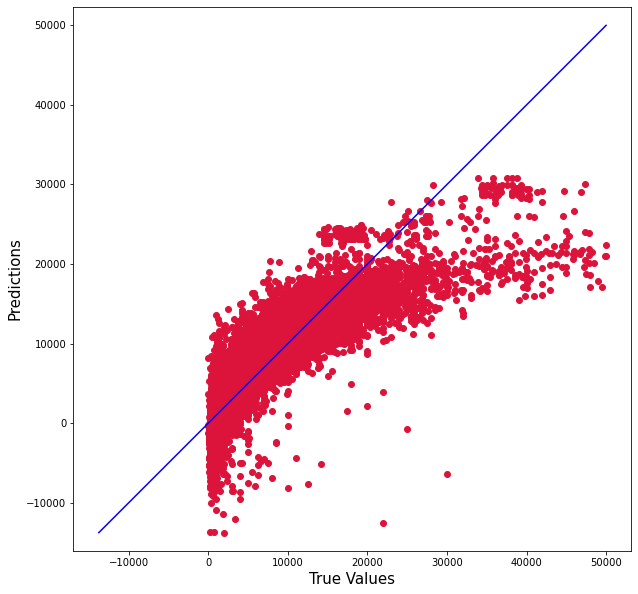

In [777]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [782]:
#Scaling

In [599]:
#to rescale the features
#this approach is avoided due to its minimal impact on model's performance

#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
#num_vars = ['odometer_value', 'number_of_photos', 'number_of_maintenance', 'duration_listed', 'price_usd']
#df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
#df_train

# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
#num_vars = ['odometer_value', 'number_of_photos', 'number_of_maintenance', 'duration_listed', 'price_usd']
#df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
#df_test

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,Volkswagen,automatic,black,0.1300,2016,diesel,diesel,1.6,universal,False,owned,front,True,0.188235,0.029088,0.030018,0.262985
1,Renault,manual,brown,0.1490,2012,gasoline,gasoline,1.6,sedan,False,owned,front,False,0.094118,0.001572,0.044803,0.149983
2,Kia,automatic,brown,0.1100,2014,gasoline,gasoline,1.6,hatchback,False,owned,front,False,0.047059,0.007075,0.040771,0.243985
3,Opel,automatic,other,0.2551,2007,gasoline,gasoline,1.8,hatchback,False,owned,front,False,0.105882,0.002358,0.040771,0.098982
4,Mazda,manual,blue,0.6500,1999,gasoline,gasoline,2.0,sedan,False,owned,front,True,0.047059,0.004717,0.027778,0.059981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49982,Volvo,automatic,grey,0.2330,2004,gasoline,gasoline,2.4,universal,False,owned,front,True,0.082353,0.002358,0.077061,0.113982
49992,Skoda,automatic,white,0.0880,2010,gasoline,gasoline,1.2,suv,False,owned,front,False,0.011765,0.000000,0.024194,0.183984
49994,Opel,manual,green,0.4000,1995,gasoline,gasoline,1.8,sedan,False,owned,front,False,0.094118,0.001572,0.009409,0.029961
49998,BMW,automatic,grey,0.6150,1998,diesel,diesel,2.5,universal,False,owned,rear,True,0.105882,0.019654,0.028674,0.101582


In [600]:
# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
#num_vars = ['odometer_value', 'number_of_photos', 'number_of_maintenance', 'duration_listed', 'price_usd']
#df_test[num_vars] = scaler.fit_transform(df_test[num_vars])
#df_test

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_type,engine_capacity,body_type,has_warranty,ownership,type_of_drive,is_exchangeable,number_of_photos,number_of_maintenance,duration_listed,price_usd
0,BMW,automatic,white,0.115,2012,gasoline,gasoline,4.4,sedan,False,owned,all,True,0.442857,0.055376,0.067126,0.408988
1,Mercedes-Benz,manual,other,0.500,1999,diesel,diesel,2.2,sedan,False,owned,rear,False,0.085714,0.004301,0.067586,0.051981
2,Fiat,manual,silver,0.210,2002,gasoline,gasoline,1.2,hatchback,False,owned,front,True,0.214286,0.003226,0.012414,0.057981
3,Mitsubishi,automatic,violet,0.294,2000,diesel,diesel,3.2,suv,False,owned,all,True,0.128571,0.000538,0.022069,0.149983
4,Opel,automatic,blue,0.244,1998,gasoline,gasoline,1.6,sedan,False,owned,front,False,0.114286,0.004839,0.053333,0.043981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26994,Lancia,manual,blue,0.331,1998,gasoline,gasoline,2.0,sedan,False,owned,front,False,0.128571,0.013978,0.028046,0.021980
26995,Volkswagen,manual,violet,0.092,1993,gasoline,gasoline,2.0,hatchback,False,owned,front,False,0.171429,0.005376,0.029885,0.066641
26997,Volkswagen,manual,white,0.450,1993,gasoline,gasoline,1.8,sedan,False,owned,front,False,0.071429,0.000000,0.016092,0.021980
26998,Audi,manual,grey,0.275,2006,gasoline,gasoline,2.0,sedan,False,owned,front,False,0.085714,0.014516,0.052874,0.125983


**XGBoost**

Based on my experience, for both regression and classification problems, XGBoost has always outperformed other models. Hence I tried the algorithm on this case too

In [594]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [778]:
from xgboost import XGBRegressor
# define model
XG_model = XGBRegressor()
# fit model
XG_model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [779]:
y_pred = XG_model.predict(x_test)

In [780]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print('r2 socre is=', score)
print('mean_absolute_error is =',mean_absolute_error(y_test,y_pred) )
print('mean_sqrd_error is==',mean_squared_error(y_test,y_pred))
print('root_mean_squared error of is==',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 socre is= 0.9493392403950995
mean_absolute_error is = 927.7262474118565
mean_sqrd_error is== 2054644.1436739531
root_mean_squared error of is== 1433.4029941624767


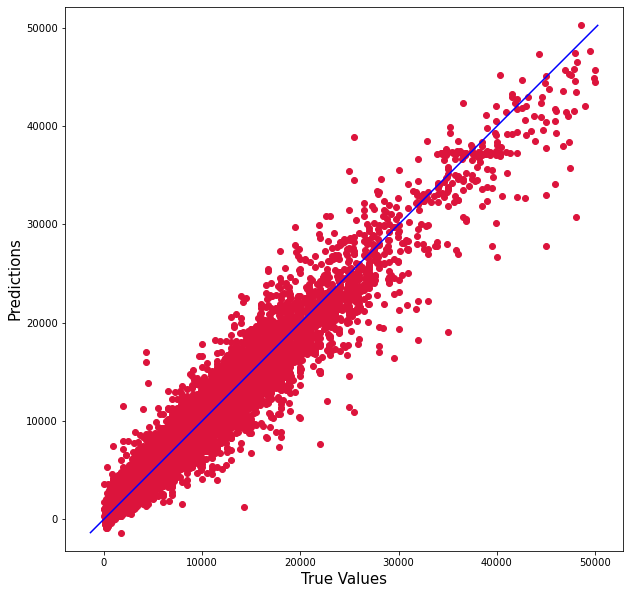

In [781]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred, c='crimson')
#plt.yscale('log')
#plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Upon trying some other approaches namely there were no major advantages, nor tangible improvement in the model's performance. The methods attempted were
1. RFE (recursive feature elimination) - there were no features which required elimination to improve model performance
2. Hyper-parameter tuning with grid search did not have much affect on model's performance
3. Rescalling the fetaures with integer values ('odometer_value', 'number_of_photos', 'number_of_maintenance', 'duration_listed', 'price_usd') had only marginal improvement in the model's performance. Rescalling also makes it difficult to directly read the output

**CONCLUSION**
1. Based on the various attempts it is evident that the mean absolute error for XGBoost seems the least with an R2 score close to 1
2. The Predcted VS true value curve for XGBoost shows a much better trend than the linear regression model
3. Hence it is best if we use the XGBoost model for future used car price predictions
4. The model can be further refined by contining to feed more data to train the model
5. Althought not attempted here, hyper parameter tuning can further improve model performance